In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plotdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]    
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

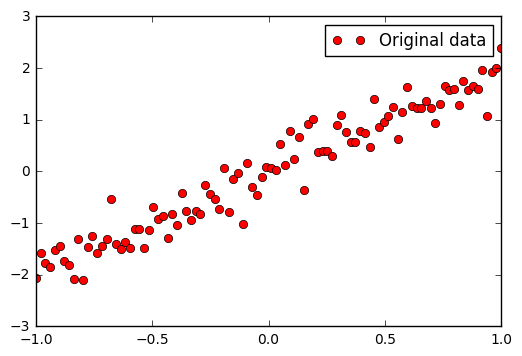

In [4]:
#生成模拟数据
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x，但是加入了噪声
#图形显示
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [8]:
# 创建模型
# 占位符
inputdict = {
    'x': tf.placeholder("float"),
    'y': tf.placeholder("float")
}

# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")
# 前向结构
z = tf.multiply(inputdict['x'], W)+ b

#反向优化
cost =tf.reduce_mean( tf.square(inputdict['y'] - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# 初始化变量
init = tf.global_variables_initializer()
#参数设置
training_epochs = 20
display_step = 2



Epoch: 1 cost= 0.4811107 W= [0.9955913] b= [0.27860126]
Epoch: 3 cost= 0.119090885 W= [1.6961665] b= [0.09065026]
Epoch: 5 cost= 0.08926457 W= [1.8861133] b= [0.01912034]
Epoch: 7 cost= 0.0872048 W= [1.9353757] b= [0.00023911]
Epoch: 9 cost= 0.087056786 W= [1.9481163] b= [-0.00464975]
Epoch: 11 cost= 0.08704426 W= [1.9514105] b= [-0.00591383]
Epoch: 13 cost= 0.087042734 W= [1.9522624] b= [-0.00624067]
Epoch: 15 cost= 0.087042466 W= [1.9524816] b= [-0.00632491]
Epoch: 17 cost= 0.08704239 W= [1.9525387] b= [-0.00634673]
Epoch: 19 cost= 0.08704239 W= [1.9525539] b= [-0.00635257]
 Finished!
cost= 0.08704237 W= [1.9525563] b= [-0.00635351]


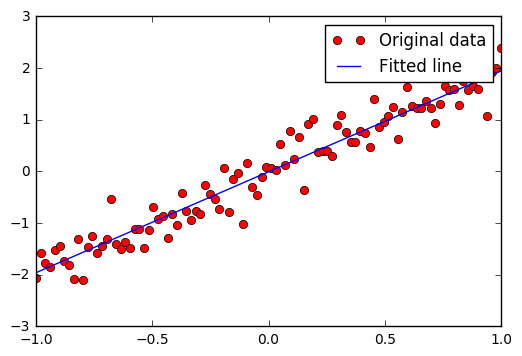

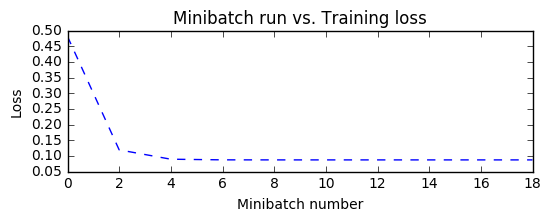

x=0.2，z= [0.38415775]


In [9]:
# 启动session
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={inputdict['x']: x, inputdict['y']: y})

        #显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={inputdict['x']: train_X, inputdict['y']:train_Y})
            print ("Epoch:", epoch+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA" ):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)

    print (" Finished!")
    print ("cost=", sess.run(cost, feed_dict={inputdict['x']: train_X, inputdict['y']: train_Y}), "W=", sess.run(W), "b=", sess.run(b))

    #图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
     
    plt.show()

    print ("x=0.2，z=", sess.run(z, feed_dict={inputdict['x']: 0.2}))
